# MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    data_temp_ = get_concat_glob(path_list)
    # print()
    data_temp_["a1"] = data_temp_["a1"] * 100
    data_temp_["a3"] = data_temp_["a3"] * 100
    data_temp_['Distribution'] = data_temp_['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    return data_temp_

In [24]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "ortho" in path: continue
        if "GNStop" in path: continue
        if "G15" in path: continue
        if "L10" in path: continue
        if "SWA" in path: continue
        if "FConly" in path: continue
        # if "FCs" in path: 
        # elif "w1b1" in path: continue
        # elif "w1b1" in path: continue
        # elif "w1" in path and "ctw1" not in path: continue
        # elif "b1" in path: continue
        if "fc" in path:
            continue
        elif "ec" in path:
            continue
        # elif "FCs" in path and "Mean5" in path:
        #     continue
        if "PCOS" in path: continue
        if "BN" in path and "noBN" not in path: continue

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "Mean1-" in path:
            data["Mean"] = "M1"
            continue
        elif "Mean1_" in path:
            data["Mean"] = "M1"
            continue
        elif "Mean16" in path: continue
        elif "Mean14" in path: continue
        elif "Mean13" in path: continue
        elif "Mean2_" in path or "Mean2-" in path:
            data["Mean"] = "M2"
            continue
            if "LR0.15" in path: continue
            elif "LR0.12" in path: continue
            elif "LR0.08" in path: continue
            elif "LR0.05" in path: continue
            elif "LR0.02" in path: continue
        elif "Mean3" in path: continue
        elif "Mean4" in path: continue
        elif "Mean5" in path:
            continue
        elif "Mean51-" in path: continue
        elif "Mean52-" in path: continue
        elif "Mean53-" in path: continue
        elif "Mean11-" in path:
            data["Mean"] = "M11"
        elif "Mean21-" in path:
            data["Mean"] = "M21"
            continue
        elif "Mean22-" in path: continue
        elif "Mean23-" in path:
            data["Mean"] = "M23"
        elif "Mean24-" in path:
            data["Mean"] = "M24"
        elif "Mean25-" in path:
            data["Mean"] = "M25"
        elif "Mean6-" in path: continue
        elif "LogitNorm_BNinit0" in path:
            data["Mode"] += "LogitNorm+BN"
            continue
        else:
            data["Mean"] = ""

        if "FCs0.5" in path:
            data["Mean"] += "+s0.5"
        elif "FCs0.1" in path:
            data["Mean"] += "+s0.1"
        elif "FCs0.05" in path:
            data["Mean"] += "+s0.05"
        elif "FCs0.01" in path:
            data["Mean"] += "+s0.01"

        if "E1" in path:
            data["Mean"] += "E1"
        elif "E2" in path:
            data["Mean"] += "E2"
        
        if "w1b1" in path:
            data["Mean"] += "wb"
        elif "ctw1" in path:
            data["Mean"] += "ctw1"
        elif "w1" in path:
            data["Mean"] += "w"
        elif "b1" in path:
            data["Mean"] += "b"
        


        if "ortFC" in path: 
            continue

        if "G11" in path: 
            data["Mode"] += "_G11"
            continue

        if "ctw" in path: 
            data["Mean"] += " (ctw " + path.split("ctw")[1][0] + ")"
            continue
            
        if "LN" in path:
            data["Mean"] += "+LN"
            continue

        if "outft" in path:
            data["Mean"] += "_DRL"
            continue

        if len(data_) == 0: 
            data_ = data
        else: 
            print(path)
            data_ = pd.concat([data_, data])
    return data_

../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E1w1b1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E1w1b1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E1w1b1/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E2w1/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E2w1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E2w1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E2w1/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E2w1b1/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E2w1b1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E2w1b1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E2w1b1/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E1w1b1/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E1w1b1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E1w1b1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__F

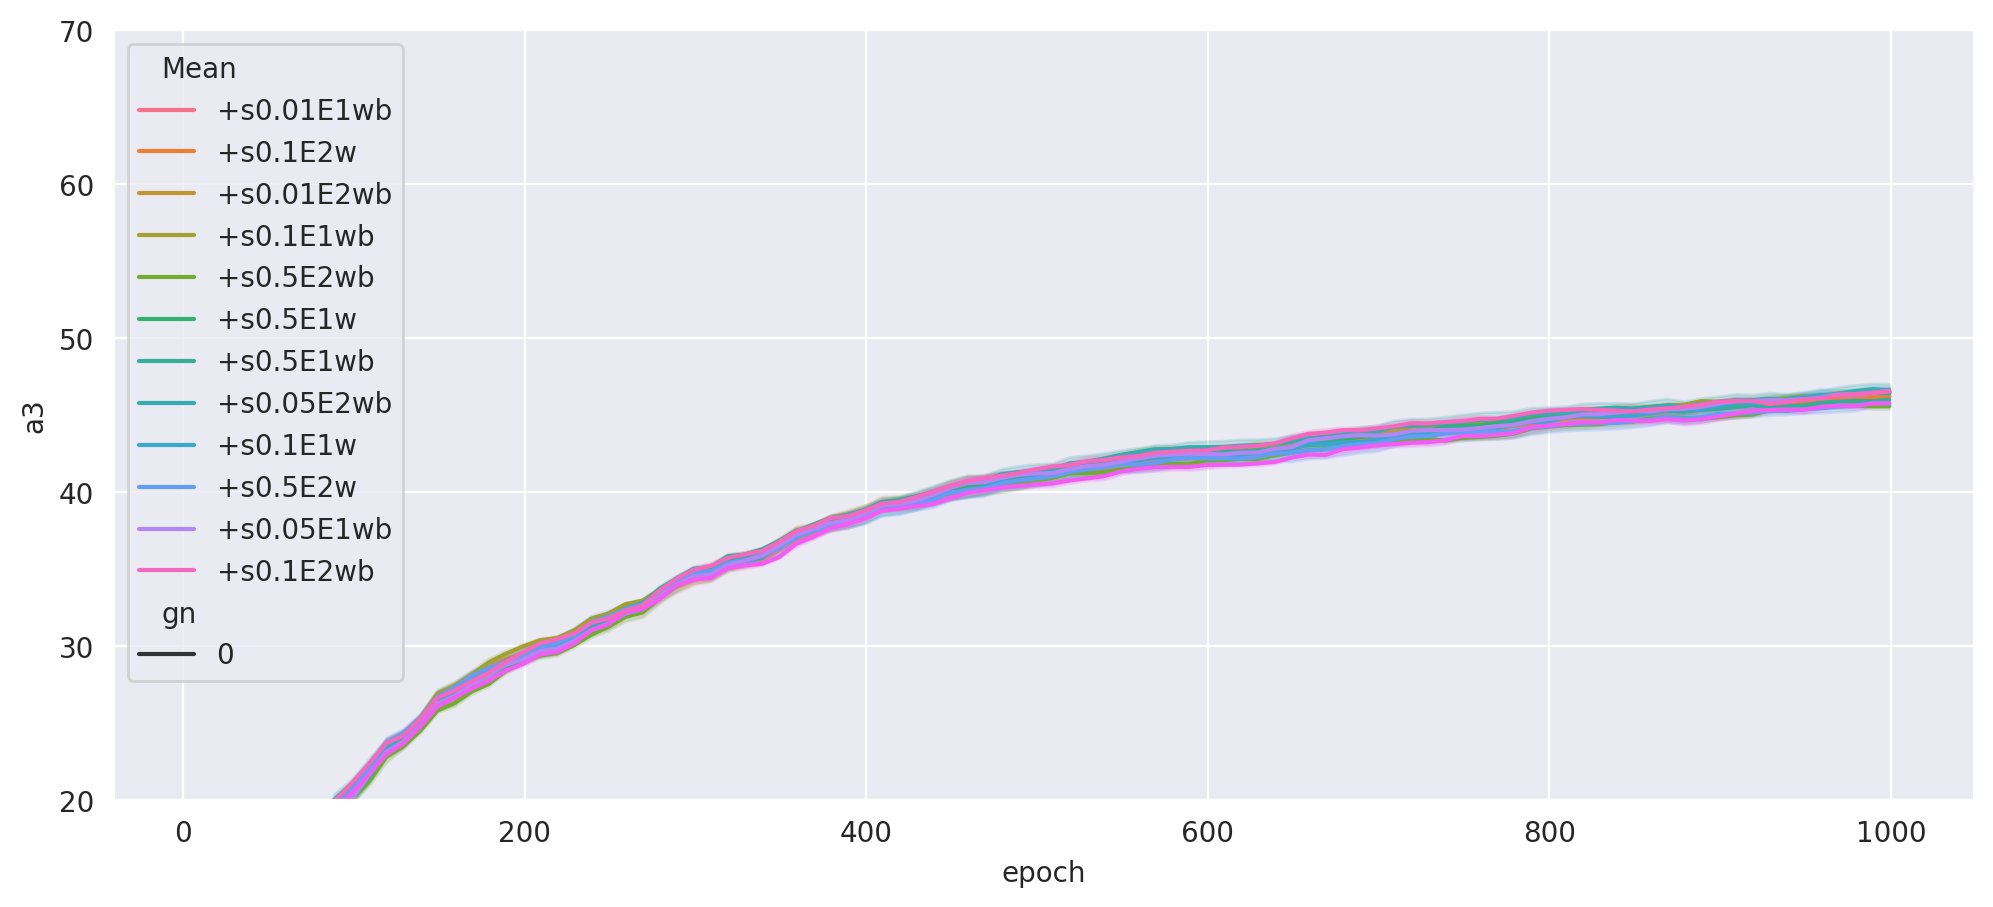

In [25]:
data_temp = load_data("../Output/CIFAR100-fedavg*-N100-P0.01*/s[1-9].csv")
# data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp])

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=200, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] <= 999]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    temp = temp[(temp["Mode"]=="fedavg")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mean", style="gn", ax=ax, errorbar="se")
    ax.set_ylim(20,70)

../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E1w1b1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E1w1b1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E1w1b1/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E2w1/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E2w1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E2w1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E2w1/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E2w1b1/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E2w1b1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E2w1b1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.01E2w1b1/s3.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E1w1b1/s4.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E1w1b1/s1.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__FCs0.1E1w1b1/s2.csv
../Output/CIFAR100-fedavg-G00-B0-D0-N100-P0.01__F

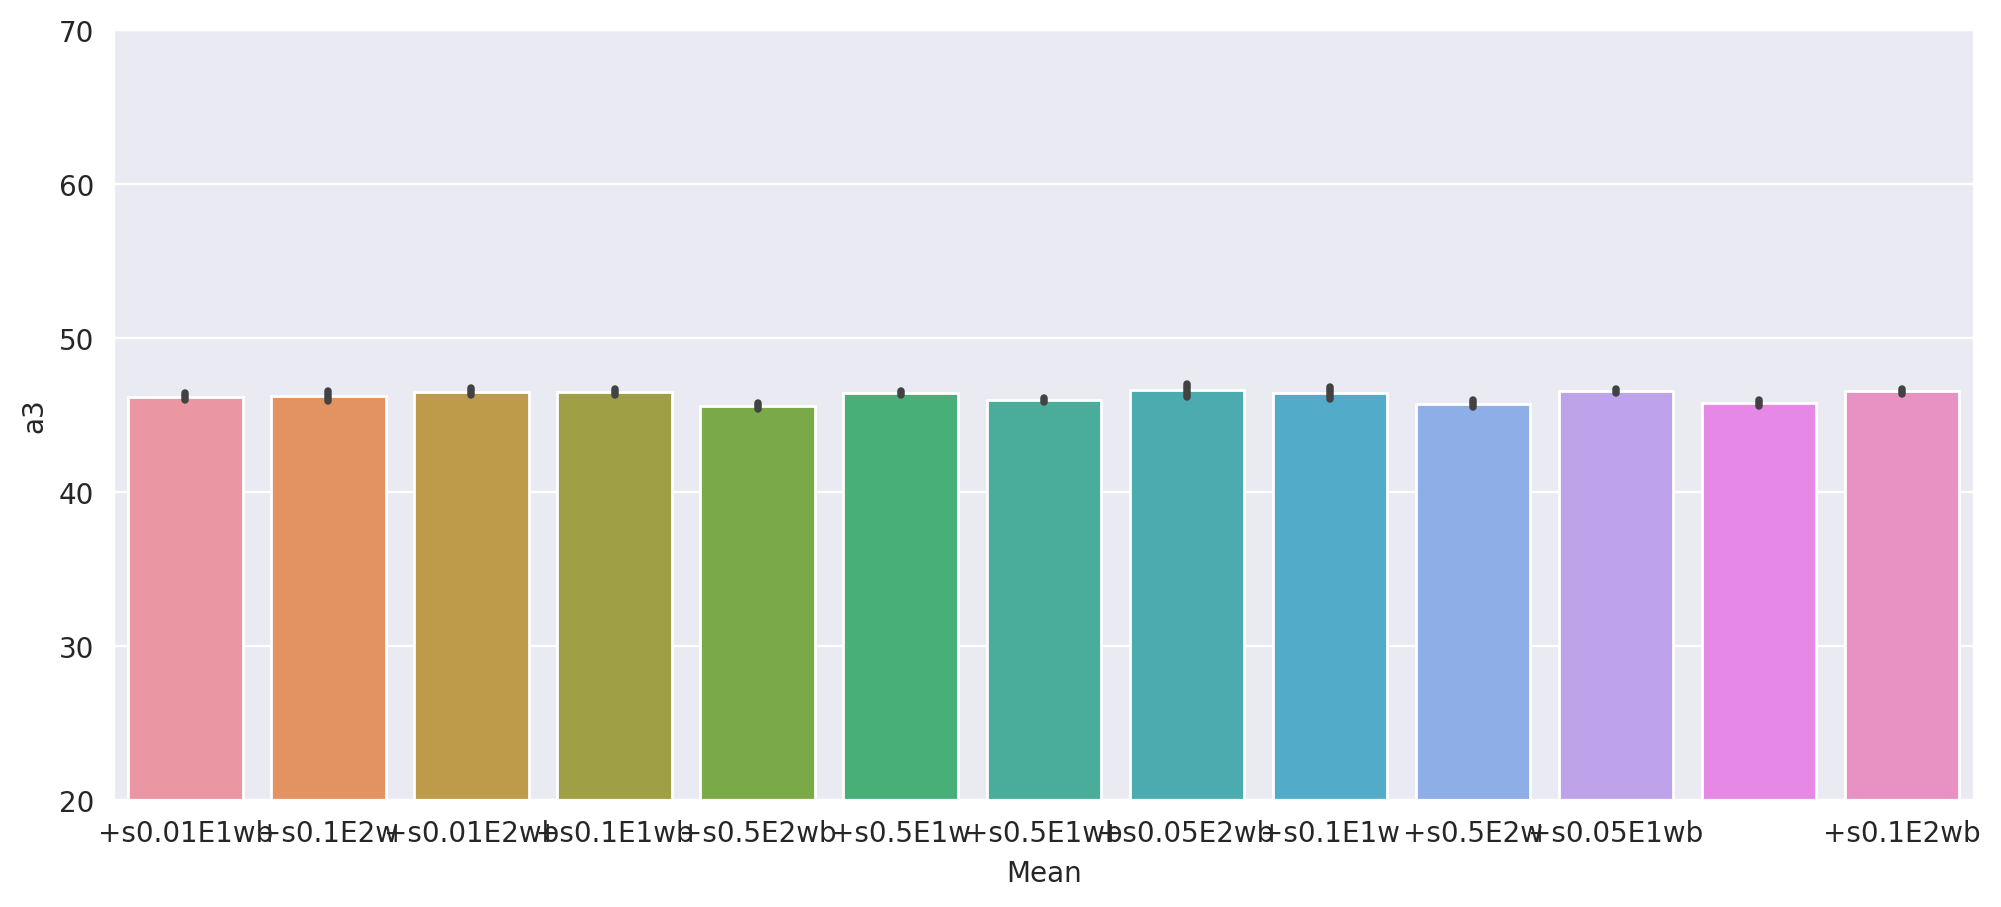

In [26]:
data_temp = load_data("../Output/CIFAR100-fedavg*-N100-P0.01*/s[1-9].csv")
# data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp])

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=200, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 999]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    temp = temp[(temp["Mode"]=="fedavg")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mean", y="a3", ax=ax, errorbar="se")
    ax.set_ylim(20,70)

(13010, 21)


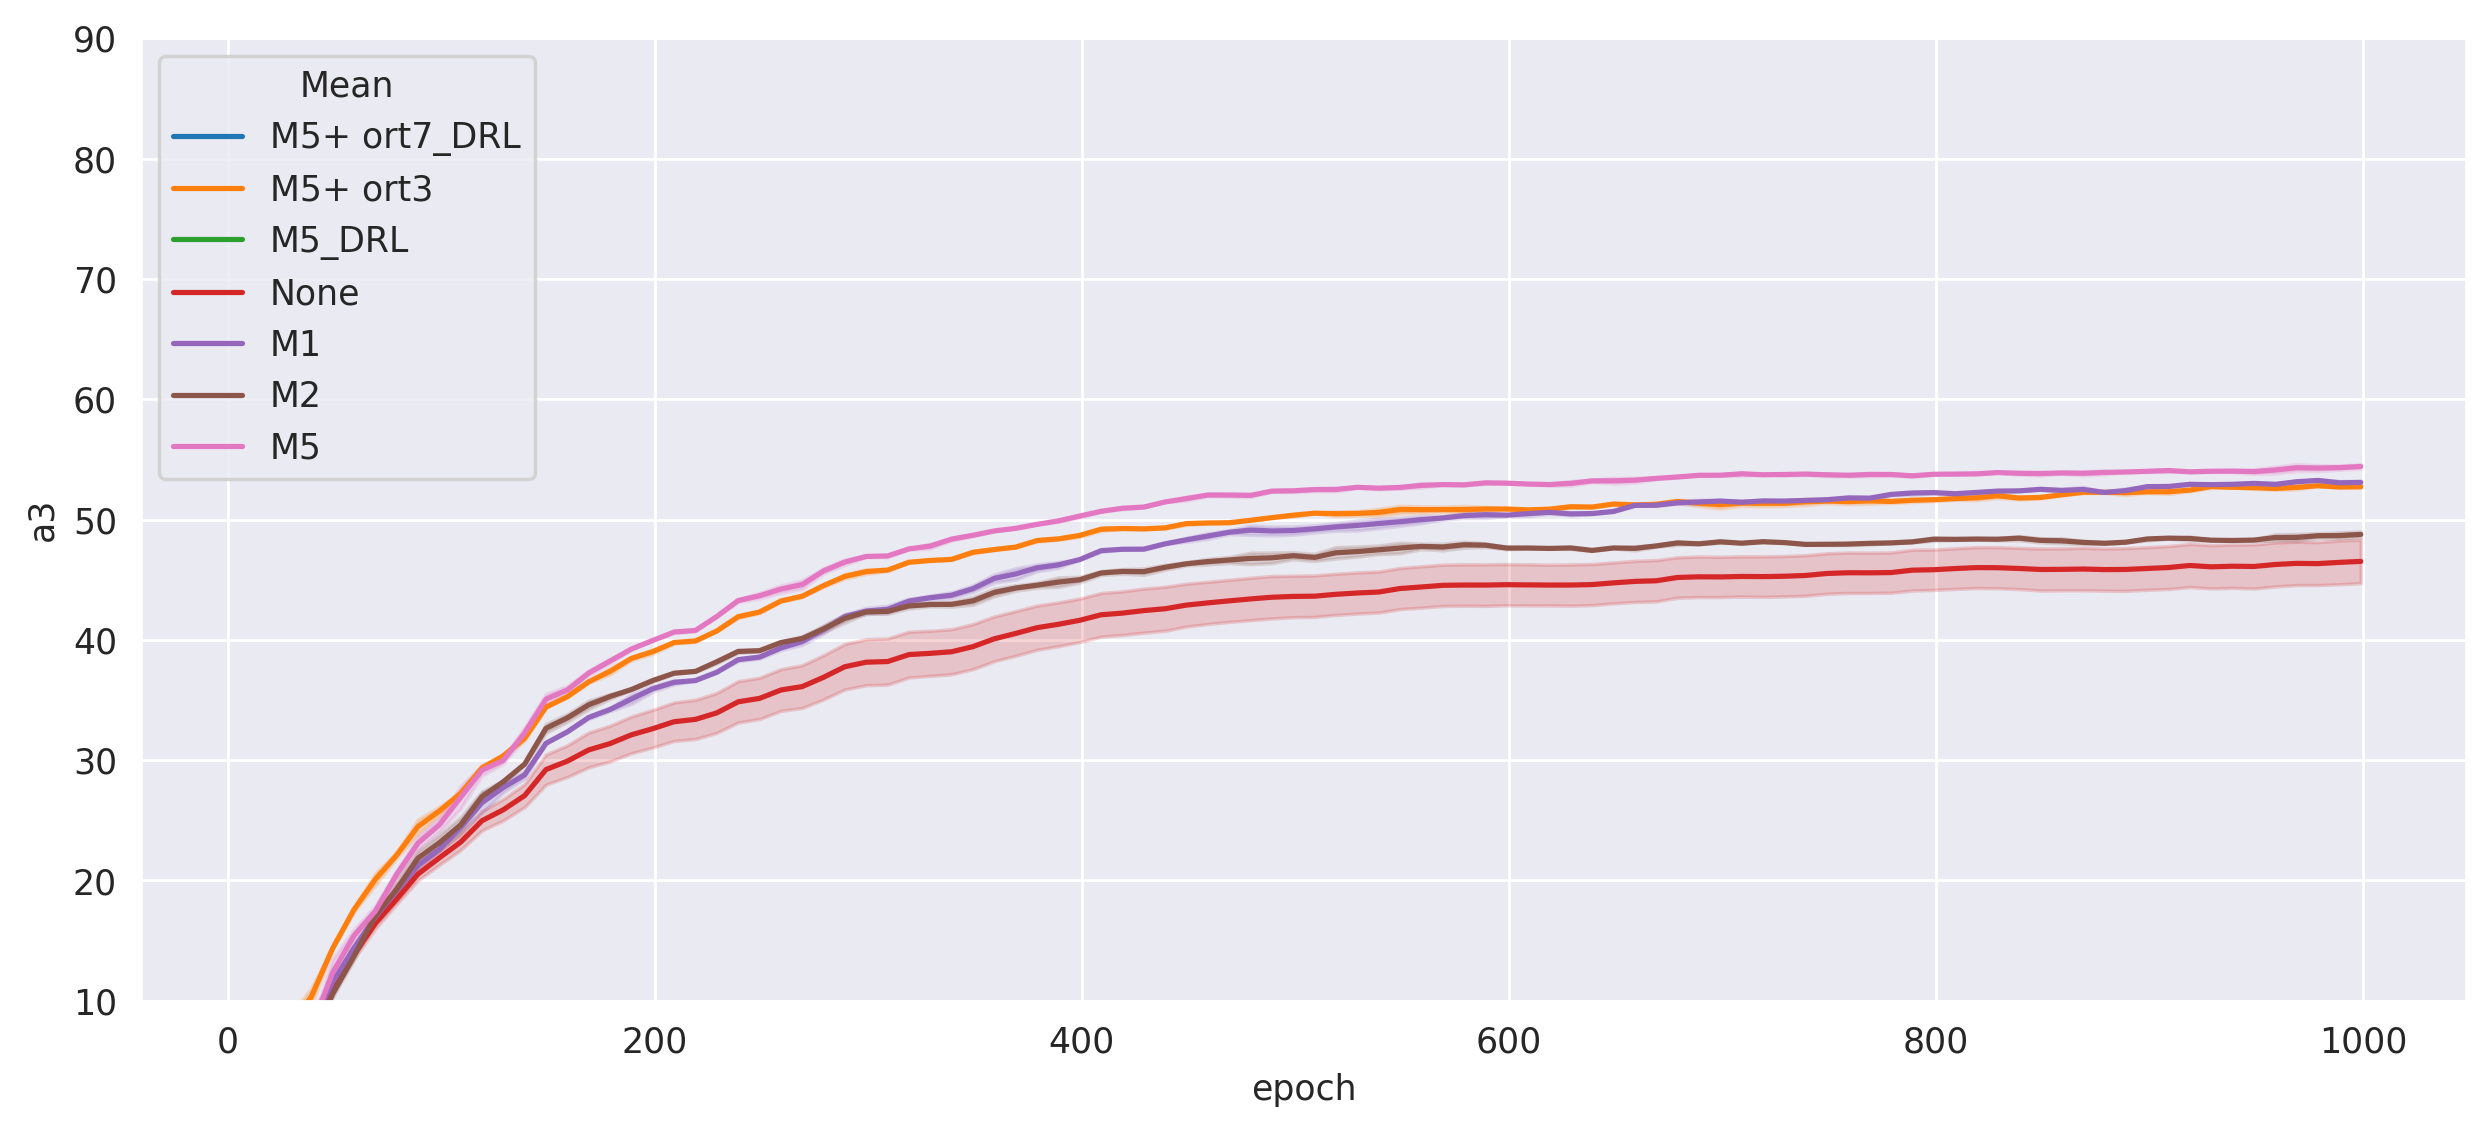

In [ ]:
data_temp = load_data("../Output/CIFAR100-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=250, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] <= 999]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    temp = temp[(temp["Mode"]=="fedavg")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(10,90)

(134, 21)


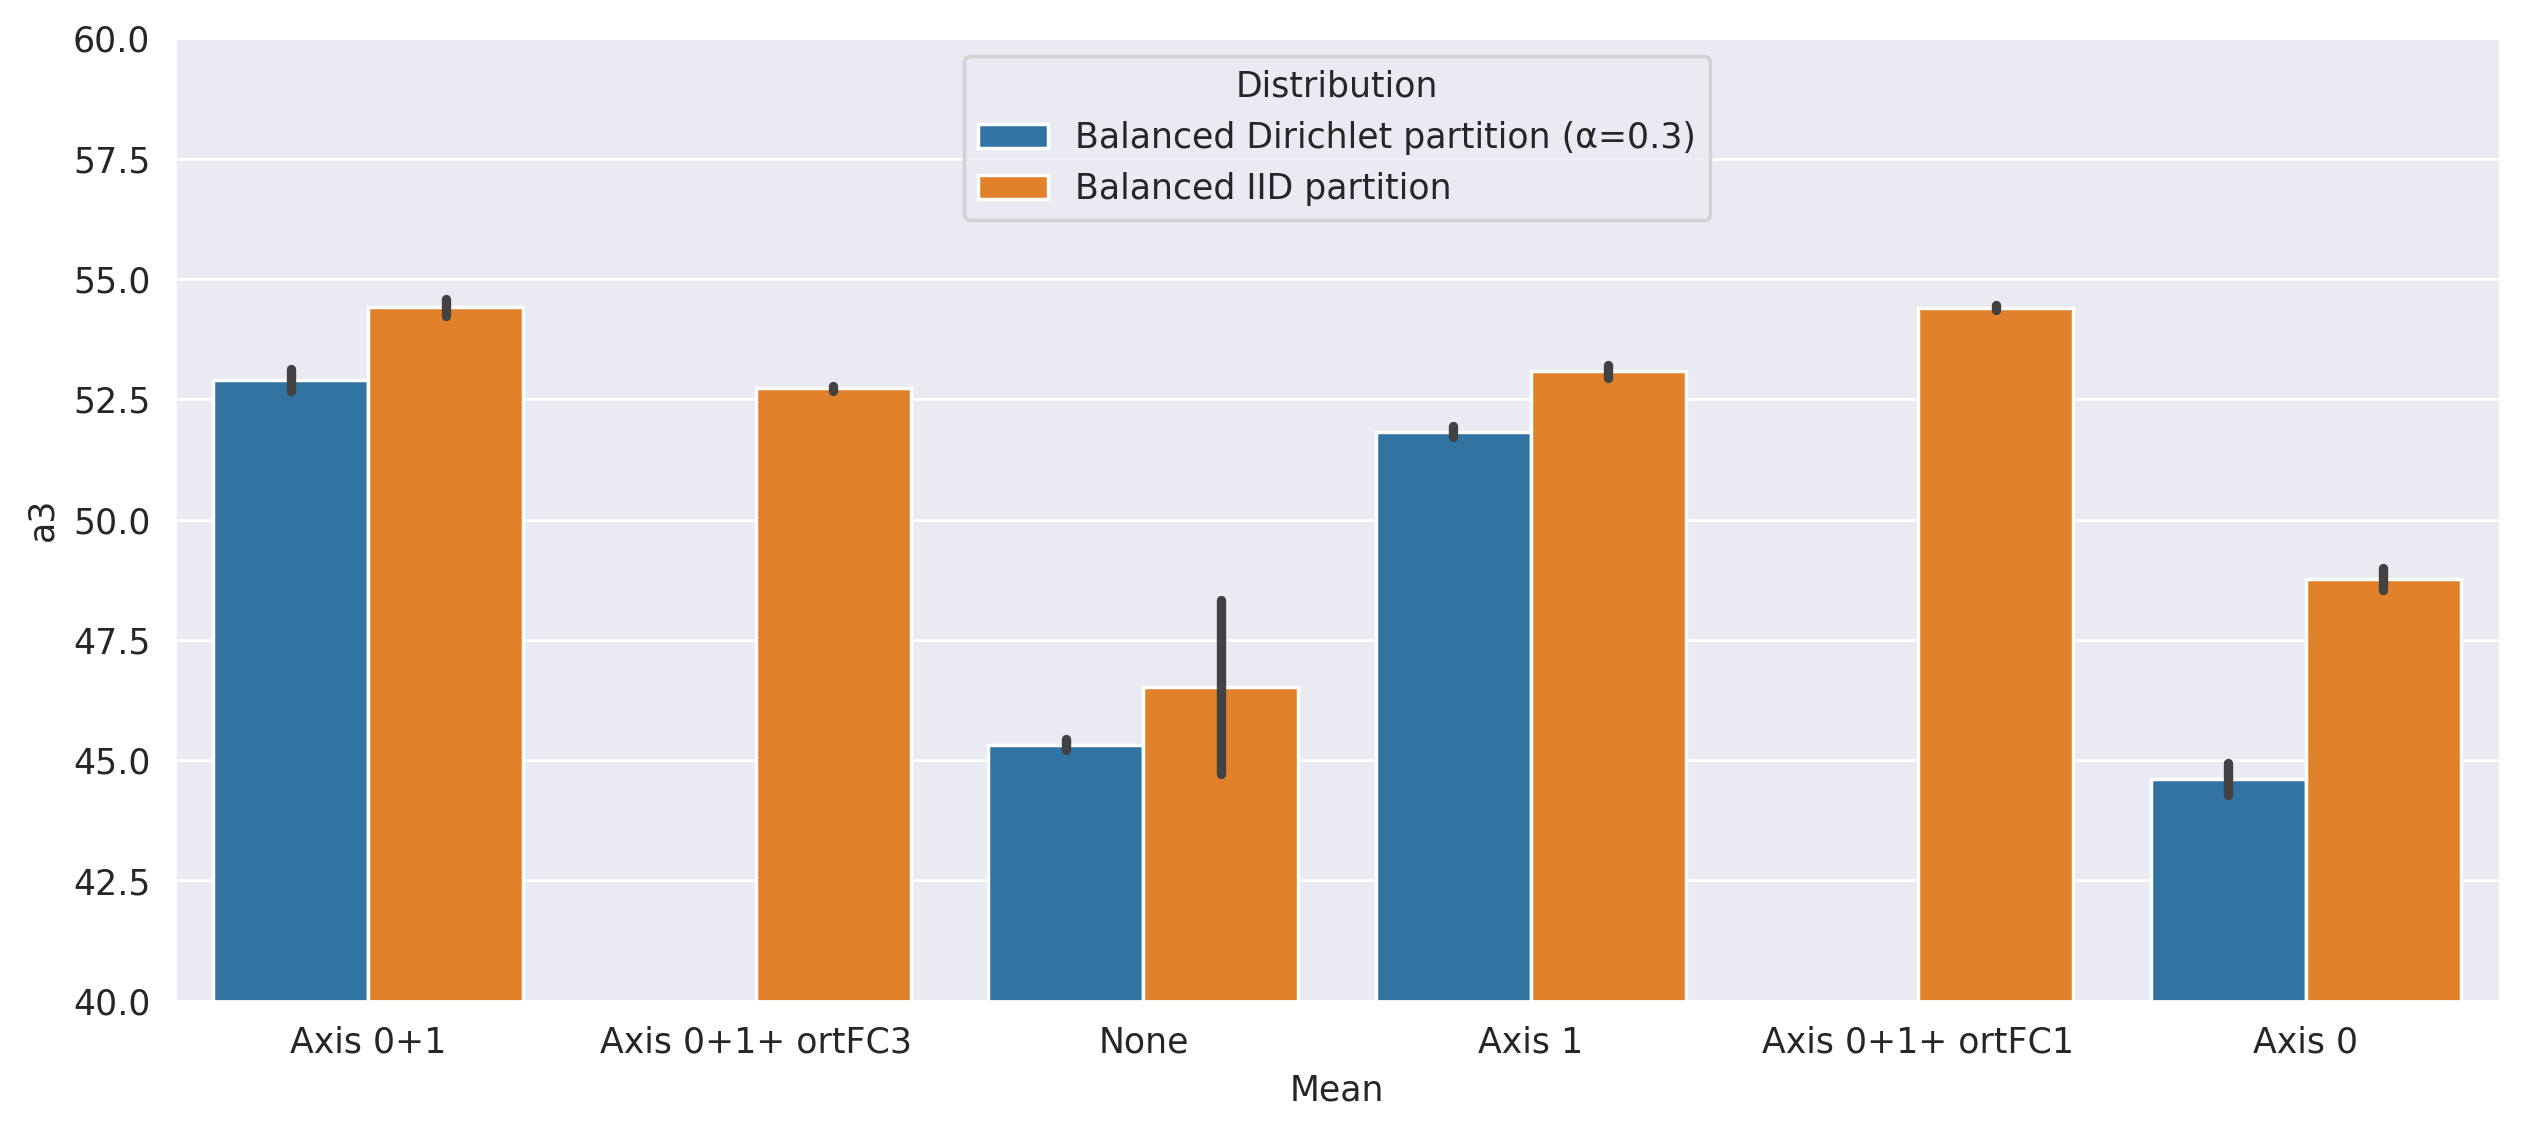

In [ ]:
data_temp = load_data("../Output/CIFAR100-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=250, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 999]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    # temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    temp = temp[(temp["Mode"]=="fedavg")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mean", y="a3", hue="Distribution", ax=ax, errorbar="se")
    ax.set_ylim(40,60)

In [ ]:
temp["Mean"].unique()

array(['Axis 0+1 (ctw 1)', 'Axis 1', 'Axis 1 (ctw 3)', 'Axis 0+1 (ctw 3)',
       'Axis 0+1', 'Axis 1 (ctw 2)', 'Axis 0+1 (ctw 2)', 'Axis 1 (ctw 1)',
       'None'], dtype=object)

../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw1-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw1-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw3-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw3-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw2-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw2-LR0.1/s2.csv
(62, 21)


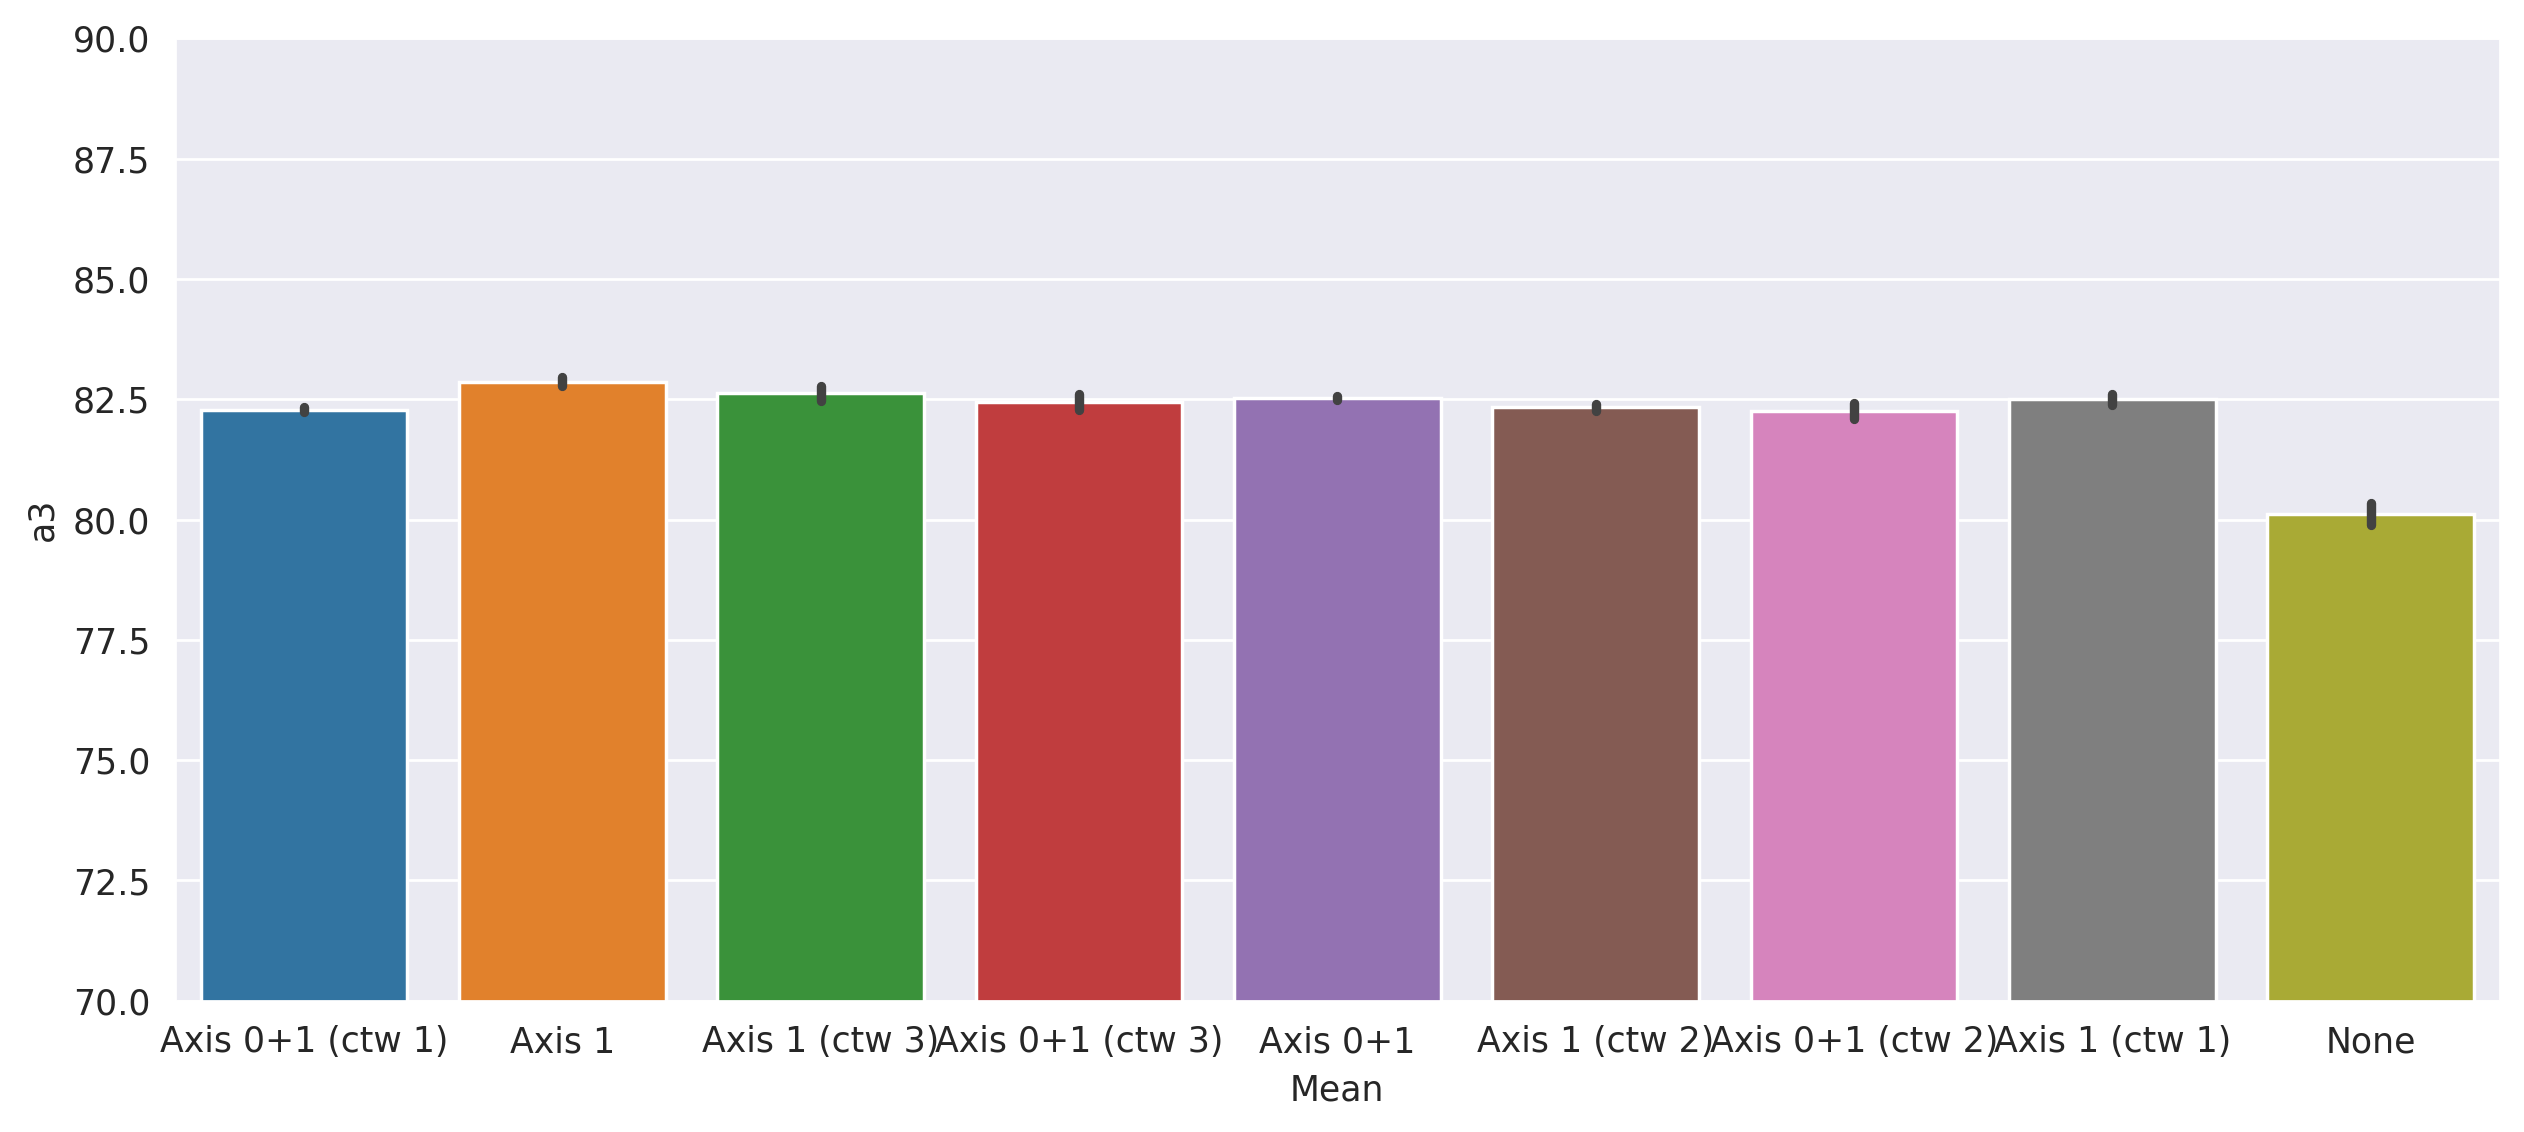

In [ ]:
data_temp = load_data("../Output/CIFAR10-*-N100-*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

# sk = ["None", "Axis 0", "Axis 1", "Axis 0+1"]
# data_temp = data_temp.set_index('Mean').loc[sk].reset_index()

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=250, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    temp = temp[(temp["Mode"]=="fedavg")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mean", y="a3", ax=ax, errorbar="se")
    ax.set_ylim(70,90)